<a href="https://colab.research.google.com/github/afnanhabib787/Artificial-Intelligence/blob/main/Cat_Dog_with_CNN_Data_augmentation_Pretrained_convnet_feature_extracting_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle\

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"afnanhabib787","key":"30b2e622f6c5384f87a3c6ea1e6a3cab"}'}

In [3]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

100% 814M/817M [00:05<00:00, 160MB/s]
100% 817M/817M [00:05<00:00, 154MB/s]


In [5]:
from zipfile import ZipFile
file_name = 'dogs-vs-cats.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
import os, shutil

In [7]:
original_dataset_dir = '/content/train/train'


In [8]:
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir)

In [9]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [10]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [11]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [12]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [13]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [14]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

In [15]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [16]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [17]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [18]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [19]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src, dst)

In [20]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir,fname)
  shutil.copyfile(src, dst)

In [21]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src, dst)

In [22]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src, dst)

In [23]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src, dst)

In [24]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [25]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [26]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [27]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [34]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [36]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=[['acc']])

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 44s 114ms/step - loss: 0.6929 - acc: 0.5345 - val_loss: 0.6757 - val_acc: 0.6050
Epoch 2/30
100/100 [==============================] - 11s 114ms/step - loss: 0.6570 - acc: 0.6080 - val_loss: 0.6487 - val_acc: 0.6200
Epoch 3/30
100/100 [==============================] - 11s 113ms/step - loss: 0.6213 - acc: 0.6615 - val_loss: 0.7000 - val_acc: 0.5610
Epoch 4/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5839 - acc: 0.6910 - val_loss: 0.6281 - val_acc: 0.6330
Epoch 5/30
100/100 [==============================] - 12s 115ms/step - loss: 0.5401 - acc: 0.7290 - val_loss: 0.5807 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5106 - acc: 0.7460 - val_loss: 0.6038 - val_acc: 0.6710
Epoch 7/30
100/100 [==============================] - 11s 114ms/step - loss: 0.4816 - acc: 0.7550 - val_loss: 0.5695 - val_acc: 0.6870
Epoch 8/30
100/100 [==============================] - 1

In [37]:
model.save('cats_and_dogs_small_1.h5')

[0.6140000224113464]

ValueError: ignored

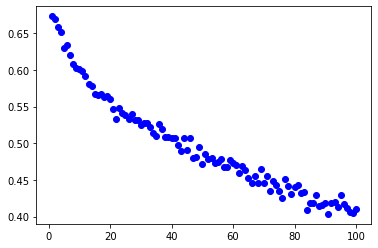

In [54]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validataion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [30]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [31]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

In [32]:
x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i +=1
  if i % 4 == 0:
    break
plt.show()

NameError: ignored

In [37]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_dir),
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(test_dir))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
34/34 [==============================] - 47s 429ms/step - loss: 0.6958 - acc: 0.4936 - val_loss: 0.6894 - val_acc: 0.5000
Epoch 2/100
34/34 [==============================] - 9s 270ms/step - loss: 0.6911 - acc: 0.5285
Epoch 3/100
34/34 [==============================] - 9s 268ms/step - loss: 0.6854 - acc: 0.5542
Epoch 4/100
34/34 [==============================] - 9s 269ms/step - loss: 0.6802 - acc: 0.5634
Epoch 5/100
34/34 [==============================] - 9s 269ms/step - loss: 0.6713 - acc: 0.5744
Epoch 6/100
34/34 [==============================] - 9s 276ms/step - loss: 0.6657 - acc: 0.5928
Epoch 7/100
34/34 [==============================] - 9s 270ms/step - loss: 0.6654 - acc: 0.5868
Epoch 8/100
34/34 [==============================] - 9s 268ms/step - loss: 0.6684 - acc: 0.5873
Epoch 9/100
34/34 [==============================] - 9s 266ms/step - loss: 0.6623 - acc: 0.6140
Epoch 10/100
34/34 [==============================] - 9s 265ms/step - loss: 0.6452 - acc: 0.6259
E

In [39]:
model.save('cats_and_dogs_small_2.h5')

In [62]:
history.history['val_acc']

[0.7699999809265137]

ValueError: ignored

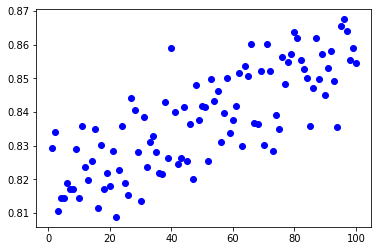

In [63]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validataion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [28]:
from tensorflow.keras.applications import VGG16

In [29]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

58900480/58889256 [==============================] - 1s 0us/step


In [30]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [34]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count,4,4,512))
  labels = np.zeros(shape=(sample_count))
  generator= datagen.flow_from_directory(
      directory,
      target_size=(150,150),
      batch_size=batch_size,
      class_mode='binary'
  )
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size:(i+1)*batch_size] = features_batch
    labels[i*batch_size:(i+1)*batch_size] = labels_batch
    i += 1
    if i*batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000,4*4*512))
test_features = np.reshape(test_features, (1000,4*4*512))

In [40]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features,validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 8ms/step - loss: 0.5819 - acc: 0.6935 - val_loss: 0.4435 - val_acc: 0.8300
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.4275 - acc: 0.8130 - val_loss: 0.3763 - val_acc: 0.8350
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3574 - acc: 0.8530 - val_loss: 0.3281 - val_acc: 0.8720
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3191 - acc: 0.8685 - val_loss: 0.3045 - val_acc: 0.8770
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2941 - acc: 0.8755 - val_loss: 0.3082 - val_acc: 0.8690
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2643 - acc: 0.8910 - val_loss: 0.2778 - val_acc: 0.8900
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2469 - acc: 0.9010 - val_loss: 0.2698 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 1s 6ms/step - loss: 0.

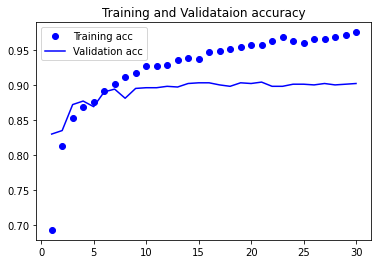

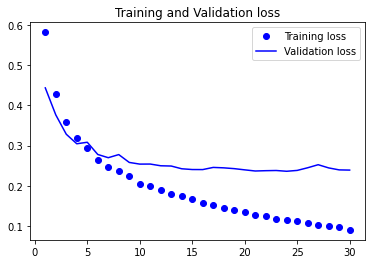

In [41]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validataion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
print("This is the nuber of trainable weights"
      'before freezing the conv base', len(model.trainable_weights))

This is the nuber of trainable weightsbefore freezing the conv base 10


In [35]:
conv_base.trainable = False

In [36]:
print("This is the nuber of trainable weights"
      'after freezing the conv base', len(model.trainable_weights))

This is the nuber of trainable weightsafter freezing the conv base 4


In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode='binary'
)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data= validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 61s 270ms/step - loss: 0.5815 - acc: 0.7125 - val_loss: 0.4513 - val_acc: 0.8240
Epoch 2/30
100/100 [==============================] - 27s 267ms/step - loss: 0.4796 - acc: 0.7790 - val_loss: 0.3762 - val_acc: 0.8560
Epoch 3/30
100/100 [==============================] - 27s 268ms/step - loss: 0.4165 - acc: 0.8190 - val_loss: 0.3459 - val_acc: 0.8610
Epoch 4/30
100/100 [==============================] - 27s 266ms/step - loss: 0.4033 - acc: 0.8170 - val_loss: 0.3149 - val_acc: 0.8800
Epoch 5/30
100/100 [==============================] - 26s 265ms/step - loss: 0.3757 - acc: 0.8370 - val_loss: 0.3029 - val_acc: 0.8740
Epoch 6/30
100/100 [==============================] - 26s 261ms/step - loss: 0.3708 - acc: 0.8375 - val_loss: 0.2886 - val_acc: 0.8880
Epoch 7/30
  9/100 [=>............................] - ETA: 18s - loss: 0.3422 - acc: 0.8500

KeyboardInterrupt: ignored

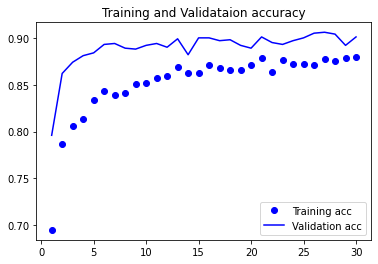

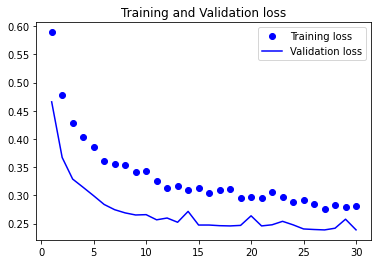

In [37]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validataion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [38]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [38]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [39]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 31s 279ms/step - loss: 0.3392 - acc: 0.8520 - val_loss: 0.2290 - val_acc: 0.9110
Epoch 2/100
100/100 [==============================] - 28s 277ms/step - loss: 0.2908 - acc: 0.8710 - val_loss: 0.2111 - val_acc: 0.9170
Epoch 3/100
100/100 [==============================] - 28s 276ms/step - loss: 0.2567 - acc: 0.8920 - val_loss: 0.2044 - val_acc: 0.9150
Epoch 4/100
100/100 [==============================] - 28s 275ms/step - loss: 0.2382 - acc: 0.8990 - val_loss: 0.2583 - val_acc: 0.8930
Epoch 5/100
100/100 [==============================] - 28s 277ms/step - loss: 0.2288 - acc: 0.9025 - val_loss: 0.1860 - val_acc: 0.9310
Epoch 6/100
100/100 [==============================] - 28s 280ms/step - loss: 0.2195 - acc: 0.9120 - val_loss: 0.1824 - val_acc: 0.9250
Epoch 7/100
100/100 [==============================] - 28s 279ms/step - loss: 0.2103 - acc: 0.9135 - val_loss: 0.1816 - val_acc: 0.9300
Epoch 8/100
100/100 [===========================

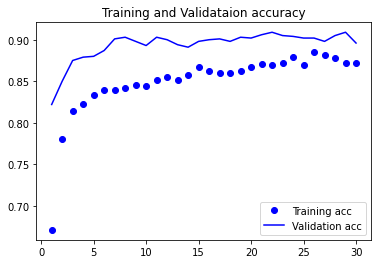

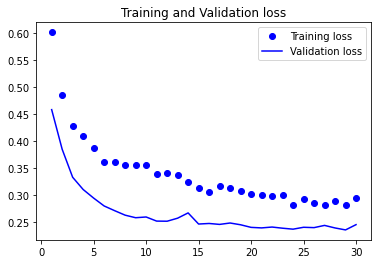

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validataion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [43]:
##Visualizing intermediate activities

In [40]:
from tensorflow.keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [41]:
img_path = '/content/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


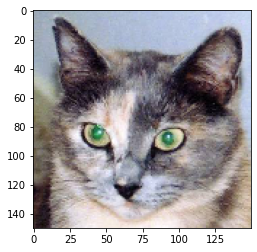

In [42]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [43]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [44]:
activations = activation_model.predict(img_tensor)

In [45]:
 first_layer_activation = activations[0]
 print(first_layer_activation.shape)

(1, 148, 148, 32)


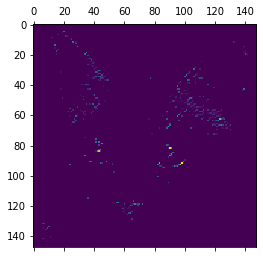

In [46]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

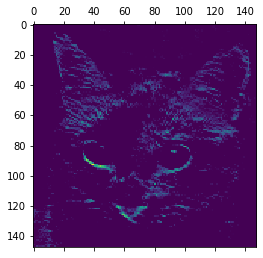

In [47]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')


In [48]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,
                                        :, :,
                                        col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size,
                   row * size : (row + 1) * size] = channel_image
  scale = 1. / size

plt.figure(figsize=(scale * display_grid.shape[1],
                   scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

TypeError: ignored